In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import shapely as shp
import pandas as pd 

In [5]:
ruta_municipios = "datasets/municipios.geojson"
ruta_precios = "datasets/precios_combustible.csv"

precios = gpd.read_file(ruta_precios)
shapes = gpd.read_file(ruta_municipios)

In [9]:
precios.head()

,departamentocodigo,departamentonombre,municipiocodigo,municipionombre,agente,bandera,direccion,producto,precio,estado,fecharegistro,geometry
0,18,CAQUETA,18756,SOLANO,COMERCIALIZADORA EL HUECO,TERPEL,Puerto Principal,BIODIESEL EXTRA,8500,1,01/08/2015 12:00:00 AM,None
1,99,VICHADA,99624,SANTA ROSALIA,ESTACION DE SERVICIO LA VICTORIA,BRIO,Carrera 9 con calle 3 No. 08-92-96,BIODIESEL EXTRA,9000,1,01/08/2016 12:00:00 AM,None
2,25,CUNDINAMARCA,25175,CHIA,COMERCIAL SANTA INES LIMITADA EN LIQUIDACION,TERPEL,CARRERA 1 No. 6A-60,GASOLINA CORRIENTE OXIGENADA,8060,1,01/04/2017 12:00:00 AM,None
3,05,ANTIOQUIA,05837,TURBO,BOMBA CODI EL PUEBLO,PROXXON,CRA 13 99 A 41,BIODIESEL EXTRA,8893,1,05/07/2018 12:00:00 AM,None
4,47,MAGDALENA,47605,REMOLINO,ESTACION DE SERVICIOS LA RUTA,ECOS,FINCA EL CHORY ENTRADA A REMOLINO EN REMOLINO,BIODIESEL EXTRA,7500,1,01/28/2017 12:00:00 AM,None


In [10]:
shapes.head()

,OBJECTID_1,DPTO_CCDGO,MPIO_CCDGO,Shape_Leng,OBJECTID,MPIO_CNMBR,DESCRPCION,DEPTO,P_ENERSI,P_ENERNO,...,P_ACUENO,P_GASNSI,P_GASNNO,P_GASNNOIN,P_TELEFSI,P_TELEFNO,P_TELEFNOI,ShapeSTArea,ShapeSTLength,geometry
0,1,18,001,2.942508,49,FLORENCIA,AREA # 18001,CAQUETA,28423.0,1992.0,...,3876,0,30415,0,13472,16507,436,2.565432e+09,325351.760092,"POLYGON ((-75.42074 2.19413, -75.42628 2.19504..."
1,2,18,029,1.112829,50,ALBANIA,AREA # 18029,CAQUETA,906.0,464.0,...,736,0,1370,0,131,1227,12,4.166676e+08,122370.537837,"POLYGON ((-75.89506 1.36570, -75.89546 1.36587..."
2,3,18,094,2.234657,51,BELEN DE LOS ANDAQUIES,AREA # 18094,CAQUETA,1314.0,888.0,...,989,0,2202,0,236,1956,10,1.199330e+09,246456.223431,"POLYGON ((-75.78705 1.74982, -75.78603 1.75216..."
3,4,18,247,3.154370,54,EL DONCELLO,AREA # 18247,CAQUETA,3666.0,869.0,...,1288,0,4535,0,503,3982,50,1.114169e+09,347905.339337,"POLYGON ((-75.36167 2.32143, -75.36259 2.32241..."
4,5,18,256,3.529316,55,EL PAUJIL,AREA # 18256,CAQUETA,2261.0,1124.0,...,1376,0,3385,0,389,2906,90,1.243568e+09,387984.910346,"POLYGON ((-75.36638 2.20952, -75.38628 2.31458..."


<Axes: >

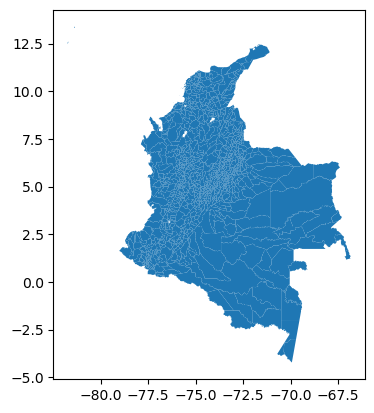

In [11]:
shapes.plot()

In [14]:
precios["producto"].unique()
precios_gasolina = precios[precios["producto"] == "GASOLINA CORRIENTE OXIGENADA"]
print(len(precios_gasolina))
precios_gasolina.head()

5291


,departamentocodigo,departamentonombre,municipiocodigo,municipionombre,agente,bandera,direccion,producto,precio,estado,fecharegistro,geometry
2,25,CUNDINAMARCA,25175,CHIA,COMERCIAL SANTA INES LIMITADA EN LIQUIDACION,TERPEL,CARRERA 1 No. 6A-60,GASOLINA CORRIENTE OXIGENADA,8060,1,01/04/2017 12:00:00 AM,None
5,68,SANTANDER,68235,EL CARMEN DE CHUCURI,ESTACION DE SERVICIO EL PORVENIR CARMEN DE CHU...,TERPEL,CORREGIMIENTO EL CENTENARIO,GASOLINA CORRIENTE OXIGENADA,9080,1,01/22/2015 12:00:00 AM,None
7,47,MAGDALENA,47605,REMOLINO,ESTACION DE SERVICIOS LA RUTA,ECOS,FINCA EL CHORY ENTRADA A REMOLINO EN REMOLINO,GASOLINA CORRIENTE OXIGENADA,8300,1,01/28/2017 12:00:00 AM,None
8,95,GUAVIARE,95200,MIRAFLORES,ESTACION DE SERVICIO LA ESMERALDA 1,TERPEL,VIA AEROPUERTO PRINCIPAL BARRIO CHINO,GASOLINA CORRIENTE OXIGENADA,10900,1,01/29/2018 12:00:00 AM,None
12,52,NARIÑO,52256,EL ROSARIO,ESTACION DE SERVICIO AUTOCENTRO ESMERALDAS,BIOMAX,CORREGIMIENTO LA ESMERALDA,GASOLINA CORRIENTE OXIGENADA,6500,1,01/24/2018 12:00:00 AM,None


In [17]:
precios_agrupados = precios_gasolina.groupby("municipionombre",as_index=False)["precio"].agg(["max"])
precios_mapa = shapes.merge(precios_agrupados, right_on="municipionombre",left_on="MPIO_CNMBR")

Text(0.5, 1.0, 'precios de gasolina 2018')

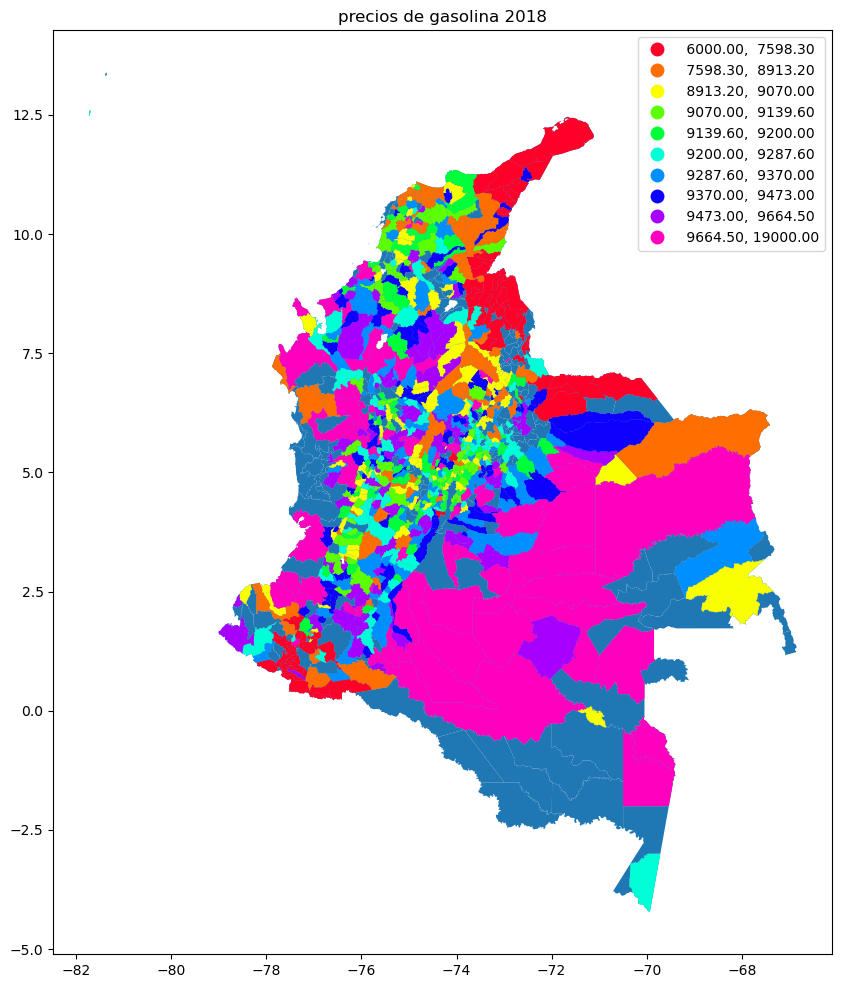

In [21]:
axis = shapes["geometry"].plot(figsize=(20, 12))
precios_mapa["max"] = precios_mapa["max"].apply(lambda X: int(X))
precios_mapa.plot(column="max", ax=axis, legend=True, scheme="Quantiles", k=10, cmap="gist_rainbow")
axis.set_title("precios de gasolina 2018")